<a href="https://colab.research.google.com/github/elva4012/Case-Study1/blob/master/2_WHich_Customer_May_Leave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Case Study 2-Which Customer May Leave**

Dataset

Source-https://www.kaggle.com/blastchar/telco-customer-churn

1. We have customer information for telecommunication company
2. We've got customer IDs, general customer info. the servies they've subscribed too,typet of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has churnded

## **Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

**Customer Churn**- Churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

Aim- is to figure out which customers may like churn in future

In [1]:
# loading data

import pandas as pd

In [2]:
file_name="https://raw.githubusercontent.com/elva4012/Dataset/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"



In [3]:
churn_df = pd.read_csv(file_name)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. what are we looking at?

   We need to figure out basically from this extensive customer database of who has changed and who hasn't yet. So we need to know whether a new customer now is likely to churn. we need to estimate whether create a classifier. whether it can predict based on previous info whether a customer likely to tune or not.
   We can predict with some degree of certainty whether that customer will be likely to churn in the future.
   Therefore, let understand our data first from describtion, summary statistics.

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In above information we can see there is no missing value

In [5]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


数据集描述

1，customerID(String)--用户ID

2，gender(String)--性别（男，女）

3，SeniorCitizen(Numeric)--用户是否属于老年人(1:是 0:不是)

4，Partner(String)--用户是否有伴侣(是，否)

5，Dependents(String)--用户是否有受赡养者（是，否）

6，tenure(Numeric)--用户在网多少个月

7，PhoneService(String)--用户是否有电话服务（是，否）

8，MultipleLines(String)--用户是否有多线服务（是，否）

9，InternetService(String)--用户的上网服务提供商（DSL，Fiber optic）

10，OnlineSecurity(String)--用户是否有在线安全服务（是，否）

11，OnlineBackup(String)--用户是否有在线备份服务（是，否）

12，DeviceProtection(String)--用户是否做了设备保护（是，否）

13，TechSupport(String)--用户是否有技术支持服务（是，否）

14，StreamingTV(String)--用户是否有stream Tv服务(是，否)

15，StreamingMovies(String)--用户是否有stream movie服务（是，否）

16，Contract(String)--用户的合同期是怎样的（一个月，一年，两年）

17，PaperlessBilli(String)--用户是否有无纸账单（是，否）

18，PaymentMethod(String)--用户支付方式（电子支票，邮寄支票，银行转账）

19，MonthlyCharges(Numeric)--用户每月缴纳的费用

20，TotalCharges(Numeric)--用户历史总共缴纳的费用

21，Churn(Numeric)--用户现在是否流失转

In [6]:
# list unique value in the datafram , e.g. by doing df['name] colum
churn_df.SeniorCitizen.unique()

array([0, 1])

In [7]:
# View unique for Tenure
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [8]:
len(churn_df.MonthlyCharges.unique())

1585

In [9]:
# Summarize the dataset

print("Rows :", churn_df.shape[0])
print("Colums :", churn_df.shape[1])
print("\nFeatures: \n", churn_df.columns.tolist())
print("\nMissing values: ", churn_df.isnull().values.sum())
print("\nUnique values: \n", churn_df.nunique())

Rows : 7043
Colums : 21

Features: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values:  0

Unique values: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [10]:
# 检查各列数据的唯一值数量
churn_df_volumn={}
for i in churn_df.columns:
    churn_df_volumn[i]=len(churn_df[i].unique())
pd.Series(churn_df_volumn)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
churn_df['Churn'].value_counts(sort=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

1869 customer have churn, 5174 has not.

## **Exploratory Data Analysis**

In [12]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Let's make a percentage column**

In [16]:
summary['Churn_Percentage']=summary['Yes']/(summary['No']+ summary['Yes'])
summary

Churn                    No  Yes  Churn_Percentage
customerID   0002-ORFBO   1    0               0.0
             0003-MKNFE   1    0               0.0
             0004-TLHLJ   0    1               1.0
             0011-IGKFF   0    1               1.0
             0013-EXCHZ   0    1               1.0
...                      ..  ...               ...
TotalCharges 997.75       1    0               0.0
             998.1        1    0               0.0
             999.45       0    1               1.0
             999.8        1    0               0.0
             999.9        1    0               0.0

[15275 rows x 3 columns]

# **Visualization and EDA**

In [17]:
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph
from pylab import rcParams # Customize Matplotlib plots using rcParams


In [18]:
# data to plot
labels = churn_df['Churn'].value_counts(sort =True).index
sizes=churn_df['Churn'].value_counts(sort=True)

colors=['lightblue', 'red']
explode= (0.05,0) # explode 1st slice

rcParams['figure.figsize']=7,7

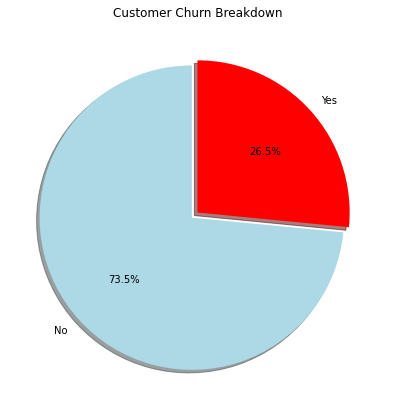

In [19]:
# plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


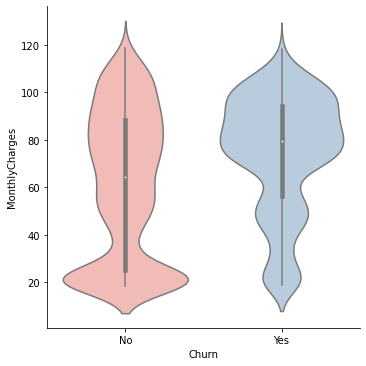

In [20]:
# Create a volin plot showing how monthly charges relate to Churn
# we can see that churned customers tend to be higher paying customer
g=sns.factorplot(x='Churn', y='MonthlyCharges', data=churn_df, kind='violin', palette='Pastel1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


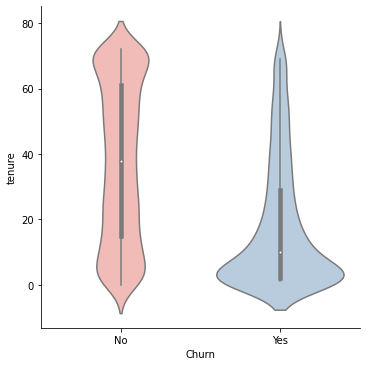

In [21]:
# Let's look at Tenure
g=sns.factorplot(x='Churn', y='tenure', data=churn_df, kind='violin', palette='Pastel1')

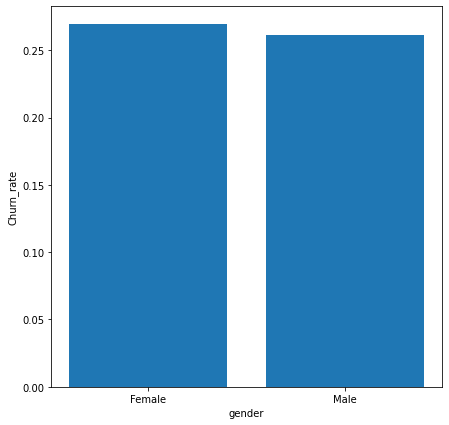

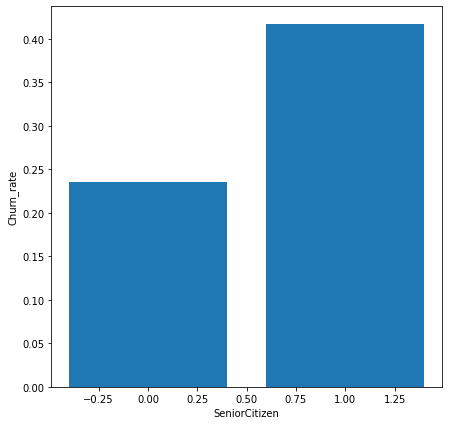

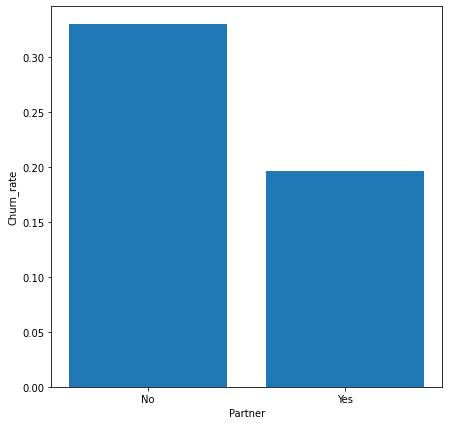

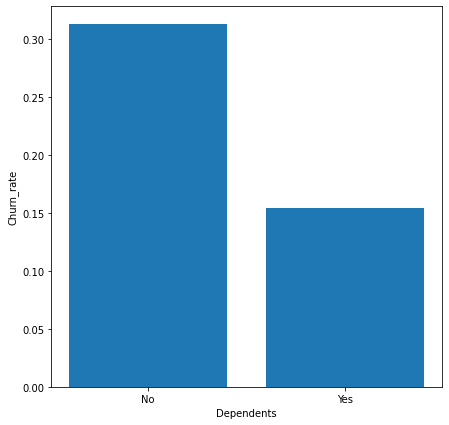

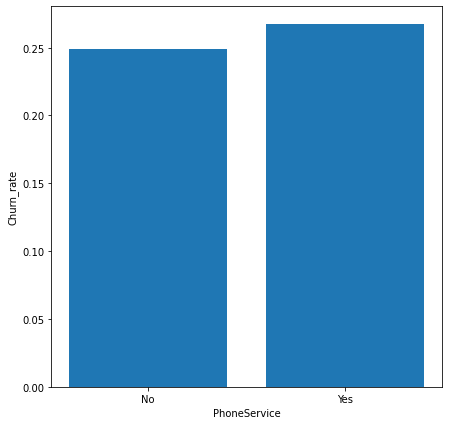

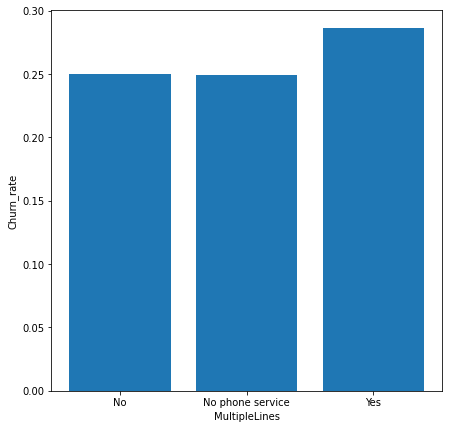

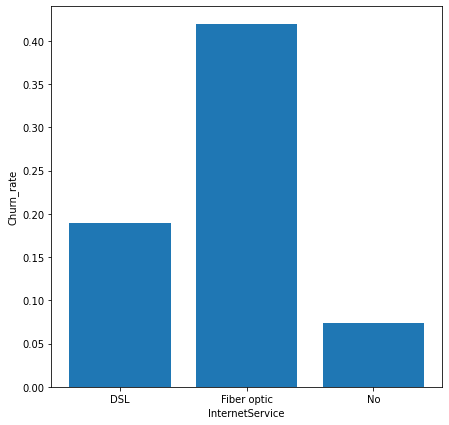

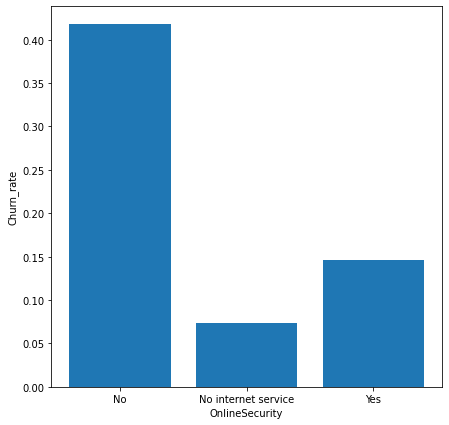

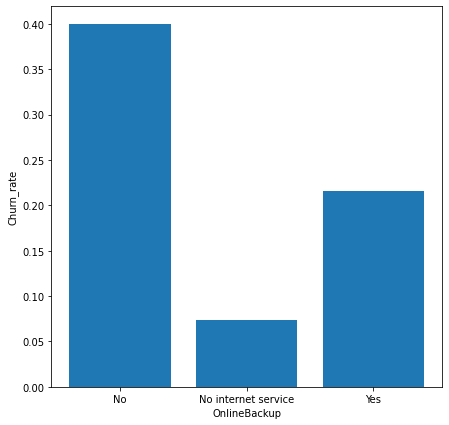

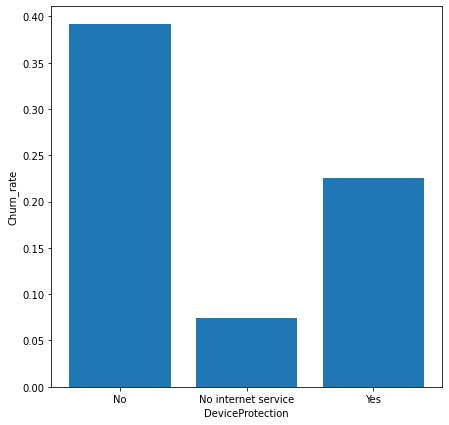

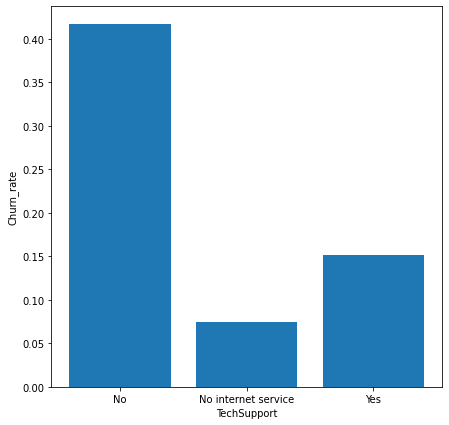

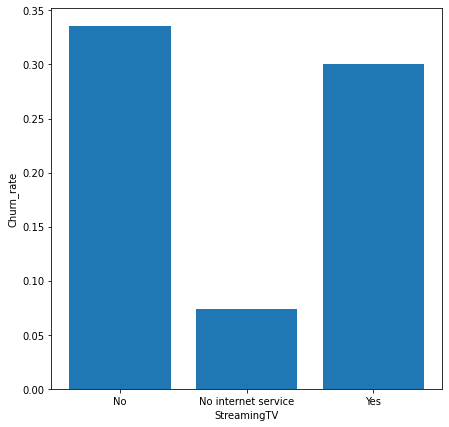

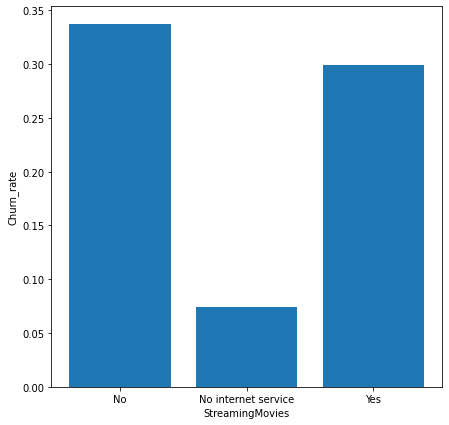

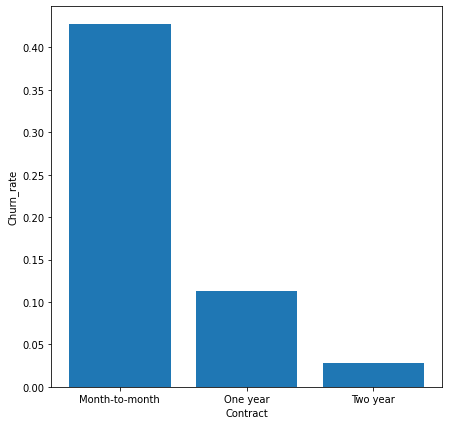

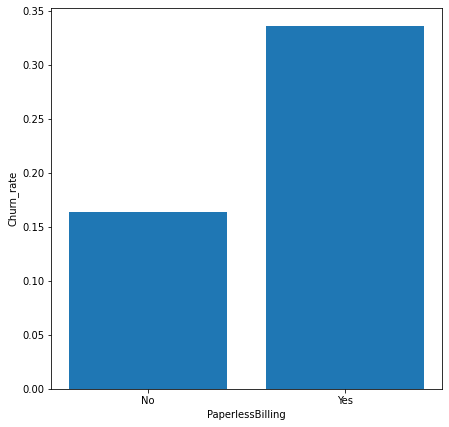

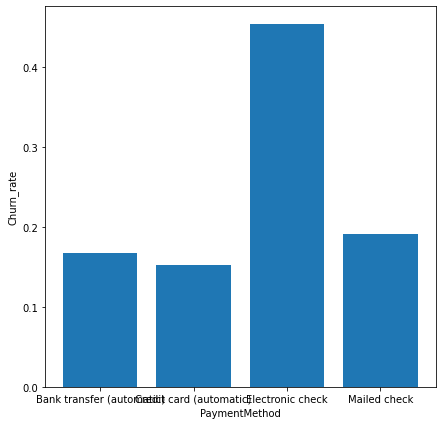

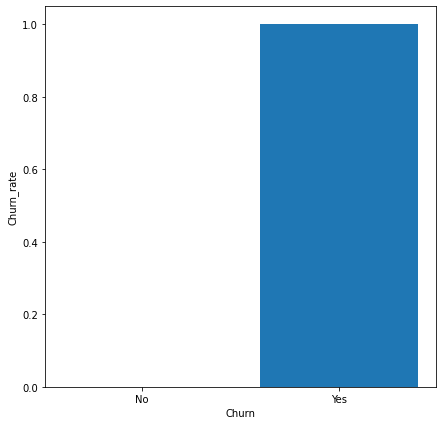

In [22]:
#建立函数，批量特征流失率探索，适用于分类少的特征
def feature_plot(churn_df,feature):
    churn_df_tem=pd.crosstab(churn_df[feature],churn_df['Churn'])
    churn_df_tem['sum']=churn_df.groupby(feature)[feature].count()
    churn_df_tem['Churn_rate']=churn_df_tem['Yes']/churn_df_tem['sum']
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.bar(churn_df_tem.index,churn_df_tem['Churn_rate'])
    ax.set_xlabel(feature)
    ax.set_ylabel('Churn_rate')


columns=[]
for i in churn_df.columns:
    if len(churn_df[i].unique())<=4:
        columns.append(i)

for j in columns:
    feature_plot(churn_df,j)

可以看出二分类特征seniorCitizen,Parner,Dependents,paperlessbilling对于流失率的不同有较大影响，

三分类特征InternetService，OnlineSecurity，OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract对于流失率的不同有较大影响, 并且StreamingTV，StreamingMovies中流失率差异体现在是否有网络而非是否有流媒体功能

四分类特征paymentMethod对流失率影响比较大的在于Electronic check的流失率比较高

## **数值型数据特征探索**



In [31]:
#建立函数，数值类特征探索,用直方图
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
def feature_value(churn_df,feature):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    sns.boxplot(churn_df.Churn,churn_df[feature],ax=ax)

In [32]:
#找出数值型特征列
columns_values=[]
for i in churn_df.columns:
    if len(churn_df[i].value_counts())>4 and (churn_df[i].dtype==np.int64 or churn_df[i].dtype==np.float):
        columns_values.append(i)

columns_values


['tenure', 'MonthlyCharges']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


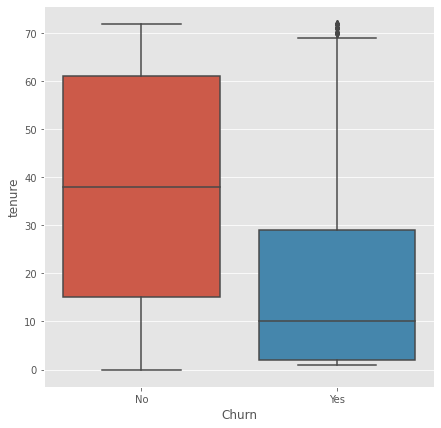

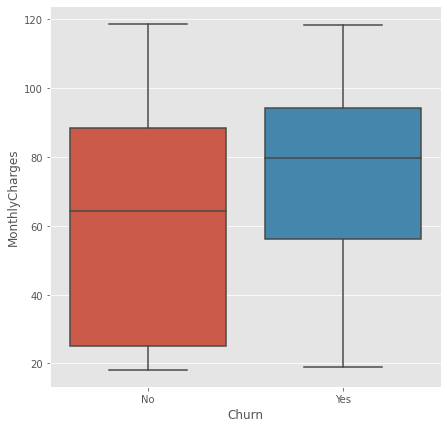

In [33]:
for i in columns_values:
  feature_value(churn_df,i)

可以发现['tenure', 'MonthlyCharges']这两个特征中流失和非流失的人的分布差异差距很大，所以可以知道使用月份，每月缴纳金额和总金额与流失情况有比较大的相关性，流失人群使用月份平均偏低，单月费用偏高，总费用偏低。

### **数值特征共线性情况探索**


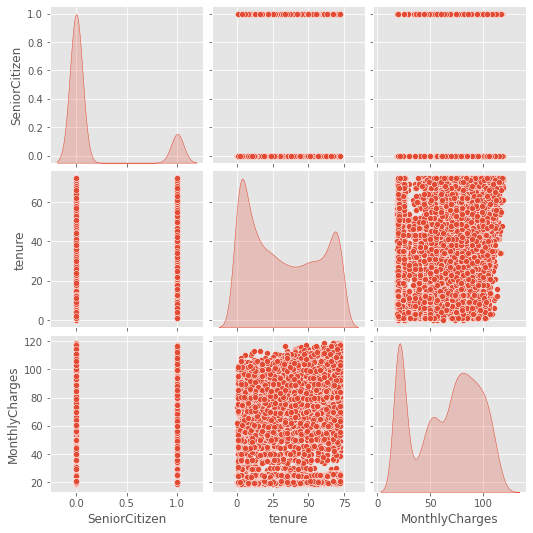

In [34]:
sns.pairplot(churn_df,diag_kind='kde')


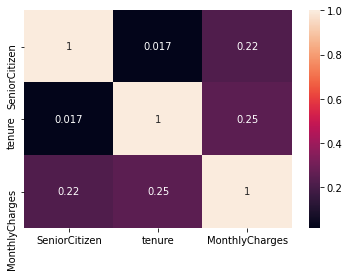

In [179]:
sns.heatmap(churn_df.corr(), square=False, annot=True)

可以看出总费用与使用月份和单月费用有非常大的相关性，这也合乎逻辑，因为总费用是受使用月份数和每月单价就定的， 后续建模分析可以只保留使用月份和每月单价，删除总费用一项。

In [156]:
#correlation plot doesn't end up being too information
%matplotlib inline
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


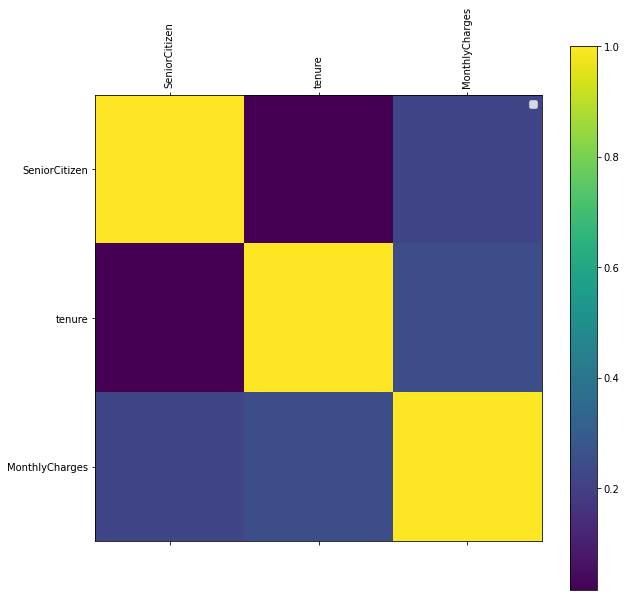

In [157]:
def plot_corr(df,size=10):
  '''Function Plots a graphical correlation matrix for each pair of colums in the dataframe.

  Input:
  df:pandas DataFrame
  size: vertical and horizontal size of the plot'''

  corr=df.corr()
  fig, ax=plt.subplots(figsize=(size,size))
  ax.legend()
  cax= ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(churn_df)

Monthly Charges has strong correlation with Churn


## **查看筛选后的数据集**



In [41]:
churn_df2=churn_df[['SeniorCitizen','Partner','Dependents','PaperlessBilling','InternetService', 
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','Contract','PaymentMethod','tenure', 'MonthlyCharges']]

churn_df2.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,tenure,MonthlyCharges
0,0,Yes,No,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,1,29.85
1,0,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,34,56.95
2,0,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,2,53.85
3,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),45,42.30
4,0,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,2,70.70


# **特征处理**
## 1.分类数据进行二值化处理

#用get_dummies()方法对分类数据进行二值化处理,返回处理好后并连接的数据集


In [44]:
def feature_processing(churn_df,n=4):#n是分类数据最大分类数
    col_prossing=[]
    #先判断分类数是否小于参数限制，判断完毕才能进入后续处理过程
    for i in churn_df2.columns:
        if len(churn_df2[i].unique())<=n:
            col_prossing.append(i)
    combine_col=[]
    for i in col_prossing:
        dum=pd.get_dummies(churn_df[i],prefix='{}'.format(i))
        combine_col.append(dum)
    churn_df_new=pd.concat(combine_col,axis=1)
    return churn_df_new

#对SeniorCitizen进行处理
churn_df2.SeniorCitizen=churn_df2.SeniorCitizen.map({1:'Yes',0:'No'})

#对分类数据二值化处理
churn_df_new=feature_processing(churn_df2)
churn_df_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## 2.数值类型数据进行标准化处理


In [45]:
#数值类型进行归一化
def feature_processing2(churn_df):
    col_processing2=[]
    for i in churn_df.columns:
        if churn_df[i].dtype==np.int64 or churn_df[i].dtype==np.float:
            col_processing2.append(i)
    combine_col2=[]
    for j in col_processing2:#标准化为0-1范围
        stand=churn_df[j].apply(lambda x:(x-churn_df[j].min())/(churn_df[j].max()-churn_df[j].min()))
        combine_col2.append(stand)
    churn_df_new2=pd.concat(combine_col2,axis=1)
    return churn_df_new2

churn_df_new2=feature_processing2(churn_df2)
churn_df_new2.head()

,tenure,MonthlyCharges
0,0.013889,0.115423
1,0.472222,0.385075
2,0.027778,0.354229
3,0.625000,0.239303
4,0.027778,0.521891


## 3.流失标签值数值化


In [46]:
#对流失标签值数值化
data_y=churn_df.Churn.map({'No':0,'Yes':1})
#连接数据
data_x=pd.concat([churn_df_new,churn_df_new2],axis=1)
data_x.sample(3)

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges
2665,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0.458333,0.749254
2685,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1.000000,0.819900
6338,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0.013889,0.019900



# Modeling
## **Prepare Data for Machine Learning Classifer**

通过决策树，逻辑回归，集成算法对构建不同模型并评估各模型准确率



### **1. 拆分数据为训练集和测试集**


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [48]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,train_size=0.8)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5634, 36)
(5634,)
(1409, 36)
(1409,)


### **2.导入相应的库**


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,f1_score,auc,confusion_matrix

### **3.对集成算法模型参数优化**

In [50]:
import time

randomforest=RandomForestClassifier()
a=time.time()
parms={'n_estimators':[20,40,60,80,100],
     'min_samples_leaf':[5,10,20,30,40]}
grid_model=GridSearchCV(randomforest,param_grid=parms,cv=StratifiedKFold(5))
grid_model.fit(x_train,y_train)
b=time.time()
total_time=b-a
print('best score:',grid_model.best_score_)
print('best score:',grid_model.best_params_)
print('total time:',total_time)

best score: 0.8036910895333499
best score: {'min_samples_leaf': 20, 'n_estimators': 40}
total time: 31.37436079978943


In [52]:
adaboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))#该模型默认的弱分类器都是深度为1的决策树
a=time.time()
parms2={'n_estimators':[20,40,60,80,100],
     }
grid_model2=GridSearchCV(adaboost,param_grid=parms2,cv=StratifiedKFold(5))
grid_model2.fit(x_train,y_train)
b=time.time()
total_time=b-a
print('best score:',grid_model2.best_score_)
print('best score:',grid_model2.best_params_)
print('total time:',total_time)

best score: 0.8003185180165202
best score: {'n_estimators': 60}
total time: 9.56693434715271


额外也对学习器决策树深度进行改变，模型默认深度为1，发现提高深度拟合能力反而下降，这里就不记录相应结果了。

### **4.比较四个模型的评分**


In [53]:
model_randomforest=grid_model.best_estimator_#获得最优参数的随机森林模型
model_adaboost=grid_model2.best_estimator_#获得最优参数的adaboost模型
model_logist=LogisticRegression()
model_tree=DecisionTreeClassifier()
models=[model_randomforest,model_adaboost,model_logist,model_tree]
scoring=[]
for model in models:
    tem_score=cross_val_score(model,x_train,y_train,cv=StratifiedKFold(5))
    scoring.append(tem_score)
score_df=pd.DataFrame(scoring,index=['randomforest','model_adaboost','logist','tree'],columns=[1,2,3,4,5])
score_mean=score_df.mean(axis=1).rename('mean')
score_std=score_df.std(axis=1).rename('std')
score_matrix=pd.concat([score_df,score_mean,score_std],axis=1)

print('{:*^30}'.format('各模型评分矩阵'))
print(score_matrix)

***********各模型评分矩阵************
                       1         2         3  ...         5      mean       std
randomforest    0.795031  0.803017  0.800355  ...  0.801954  0.801739  0.004800
model_adaboost  0.781721  0.802130  0.804791  ...  0.794849  0.800319  0.013372
logist          0.779947  0.820763  0.801242  ...  0.795737  0.802448  0.016084
tree            0.742680  0.721384  0.736469  ...  0.712256  0.725947  0.013038

[4 rows x 7 columns]


cross_val_score由于没有制定评分指标，因此模型根据代入模型的默认评分指标进行评分，可以看出训练集都不错，接近80%的正确率。决策树的相对低点。现在对测试集进行预测

***********model_randomforest的混淆矩阵************
ACTUAL    NEGETIVE  POSITIVE
PREDICT                     
NEGETIVE       944        84
POSITIVE       208       173
***********model_randomforest的roc图************


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text

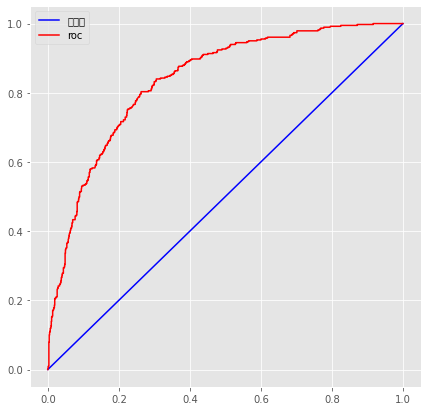

***********model_adaboost的混淆矩阵************
ACTUAL    NEGETIVE  POSITIVE
PREDICT                     
NEGETIVE       922       106
POSITIVE       180       201
***********model_adaboost的roc图************


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text

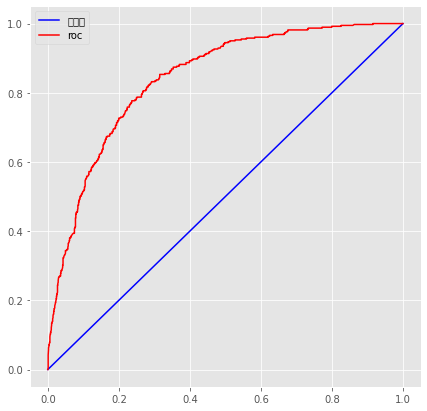

***********model_logist的混淆矩阵************
ACTUAL    NEGETIVE  POSITIVE
PREDICT                     
NEGETIVE       917       111
POSITIVE       179       202
***********model_logist的roc图************


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text

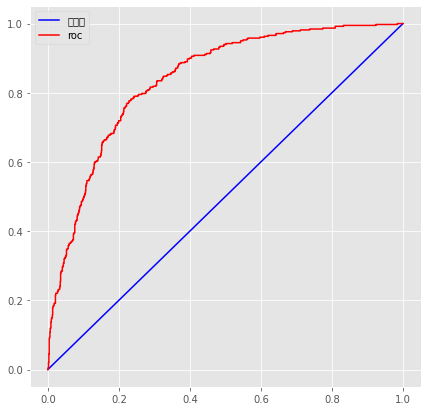

***********model_tree的混淆矩阵************
ACTUAL    NEGETIVE  POSITIVE
PREDICT                     
NEGETIVE       837       191
POSITIVE       179       202
***********model_tree的roc图************


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text

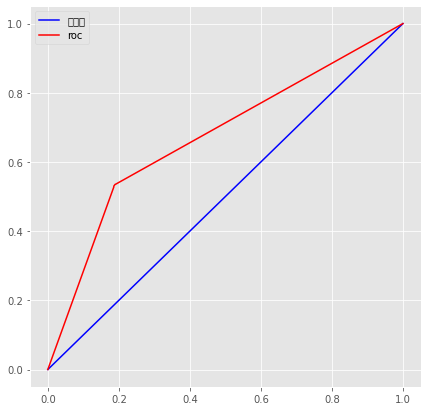

In [54]:
from sklearn.metrics import roc_auc_score
scores=[]
models_name=['model_randomforest','model_adaboost','model_logist','model_tree']
for i,model in enumerate(models):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    ac=accuracy_score(y_test,y_predict)#y_test在前，y_predict在后
    pc=precision_score(y_test,y_predict)
    rc=recall_score(y_test,y_predict)
    f1=f1_score(y_test,y_predict)
    confusion=confusion_matrix(y_test,y_predict)
    confusion_df=pd.DataFrame(confusion,index=['NEGETIVE','POSITIVE'],columns=['NEGETIVE','POSITIVE'])
    confusion_df.index.name='PREDICT'
    confusion_df.columns.name='ACTUAL'
    print('{:*^30}'.format('{}的混淆矩阵').format(models_name[i]))
    print(confusion_df)
    y_pro=model.predict_proba(x_test)#概率值两列，第一列为正例概率
    fpr,tpr,thresholds=roc_curve(y_test,y_pro[:,1])#
    auc_s=roc_auc_score(y_test,y_pro[:,1])
    scores.append([ac,pc,rc,f1,auc_s])
    print('{:*^30}'.format('{}的roc图').format(models_name[i]))
    fig=plt.figure()
    plt.style.use('ggplot')
    plt.plot([0,1],[0,1],c='b',label='随机线')
    plt.plot(fpr,tpr,c='r',label='roc')
    plt.legend(loc='best')
    plt.show()

In [55]:
#模型个指标对比
scores_matrix=pd.DataFrame(scores,columns=['accuracy','precision','recall','f1','auc'],index=models_name)
print(scores_matrix)

                    accuracy  precision    recall        f1       auc
model_randomforest  0.792761   0.673152  0.454068  0.542320  0.836692
model_adaboost      0.797019   0.654723  0.527559  0.584302  0.841311
model_logist        0.794180   0.645367  0.530184  0.582133  0.838820
model_tree          0.737402   0.513995  0.530184  0.521964  0.672946


**总结：综上可以看出三个模型的拟合效果一般，虽然从准确率来看都还行，但是从召回率和精确率来看， 对于会流失的用户的预测水平还是偏低。其中逻辑回归的随机森林效果相差不大，决策树的效果不太理想， 因为用cross_val_score使用模型本身的评分标准，如果也用precision，recall，accuracy指标去评估训练数据如下图结果， 会发现决策树存在过拟合问题，所以对测试集的预测能力比较差。**

**决策树的过程**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31243 missing from current font.
  font.set_

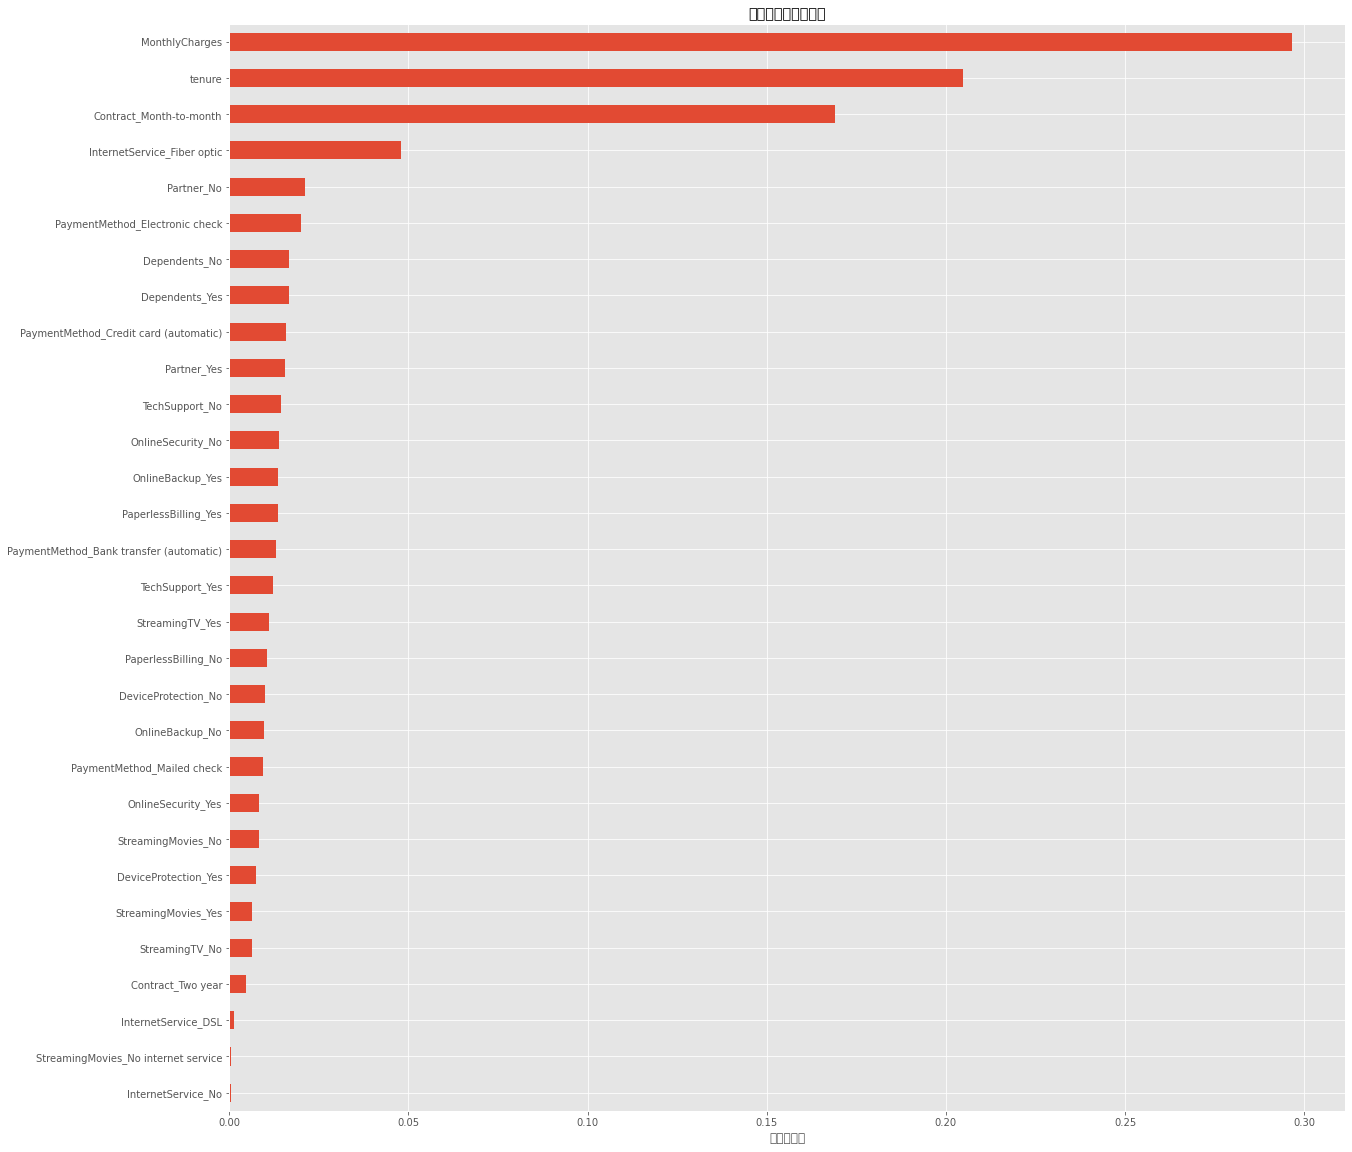

In [57]:
#查看特征的重要程度
importance_metrics=pd.Series(model_tree.feature_importances_,index=data_x.columns).sort_values()
fig=plt.figure(figsize=(20,20))
plt.style.use('ggplot')
ax=fig.add_subplot(1,1,1)
importance_metrics[importance_metrics>0].plot.barh(ax=ax)
ax.set_xlabel('重要性程度')
ax.set_title('各特征重要程度分析')
plt.show()

In [59]:
#保存决策树规则图
import pydotplus
from sklearn import tree


In [60]:
dot_data=tree.export_graphviz(decision_tree=model_tree,max_depth=6,feature_names=data_x.columns,
                              filled=True,rounded=True,out_file=None)#out_file控制不生成dot对象，否则dot_data为空
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(r'C:\Users\elva4\OneDrive\Desktop\Data Science\Case Study')
True

True

**项目总结与思考**

**由于本次项目没有对决策树模型进行参数调优，因此可以发现模型存在过拟合问题，是的预测结果相比其他三个不理想。纵观其他三个模型则是基本相同的预测能力，并且模型泛化能力也不错，但由于时间问题，并没有对随机森林和adaboost模型的更多参数进行优化，所以模型结果可能也会比最好的有些许差距。从四个模型来看，对于流失为是的预测能力不太理想，这也和数据量有一定的关系，所以如果数据量能够更多，我相信模型的预测分数也会更高**